
    (50 points) Dimension Reduction for  the breast cancer Wisconsin dataset 

from sklearn import datasets

load data directly into X and y if you just need to load data.

X, y = datasets.load_breast_cancer(return_X_y=True)

(a) (25 points) Use PCA and T-SNE to reduce the dimension to 2. 

(b) (25 points) Plot out the 2 dimensional features for both and discuss the differences between them.

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
from sklearn import manifold
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np

X,y = datasets.load_breast_cancer(return_X_y=True)

In [7]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

C:\Users\liwtt\AppData\Local\Temp\ipykernel_16868\3063603568.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


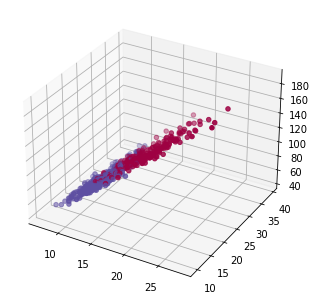

In [8]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.Spectral)
plt.show()

Text(0.5, 1.0, 'Projected data')

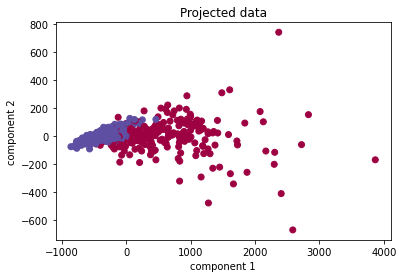

In [9]:
plt.scatter(X_r[:, 0], X_r[:,1],
            c=y, cmap=plt.cm.Spectral)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('Projected data')

In [10]:
pca = PCA(n_components=2)
PCA_projected = pca.fit_transform(X.data)

In [11]:
## TSNE

tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
TSNE_projected = tsne.fit_transform(X.data)


c:\Users\liwtt\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\liwtt\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [12]:
def draw_components(Y_projected, title):
    plt.scatter(Y_projected[:,0], Y_projected[:, 1],
        c=y,
        edgecolor='none', alpha=0.5,
        cmap=plt.get_cmap('rainbow', 10))
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    #plt.colorbar()
    plt.title(title)


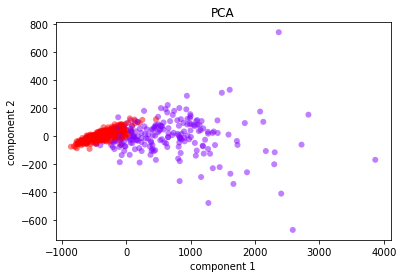

In [13]:
draw_components(PCA_projected, 'PCA')

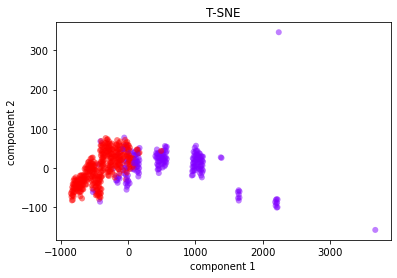

In [14]:
draw_components(TSNE_projected, 'T-SNE')

    From these two graphs we can see that T-SNE does a better job of capturing the separation of data. It would be easier to then perform a k-means cluster using the T-SNE plot rather than the PCA one.

# Part 2


    (50 points) Regression Analysis with the diabetes dataset

import pandas as pd

from sklearn import datasets

diabetes = datasets.load_diabetes()

 load data into a Pandas DataFrame when you need to do EDA.

df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

df["target"] = diabetes.target

(a) (10 points) Carry out exploratory data analysis for the data set and identify top 3 features that are correlated with the target.

(b) (10 points) Build a multilinear regression model with those 3 features identified in (a).

(c) (10 points) Build a Ridge regression model with the top correlated feature identified in (a).

(d) (10 points) Build a Deep Neural Network with 3 hidden Dense layers with all the features.

(e) (10 points) Compare the R2 scores for all the models and discuss the results.

In [15]:
import pandas as pd
diabetes = datasets.load_diabetes()

df = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
df['target'] = diabetes.target

In [16]:
df.corr().style.background_gradient(cmap='Spectral').set_precision(2)

C:\Users\liwtt\AppData\Local\Temp\ipykernel_16868\2499564198.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.corr().style.background_gradient(cmap='Spectral').set_precision(2)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.00,0.17,0.19,0.34,0.26,0.22,-0.08,0.20,0.27,0.30,0.19
sex,0.17,1.00,0.09,0.24,0.04,0.14,-0.38,0.33,0.15,0.21,0.04
bmi,0.19,0.09,1.00,0.40,0.25,0.26,-0.37,0.41,0.45,0.39,0.59
bp,0.34,0.24,0.40,1.00,0.24,0.19,-0.18,0.26,0.39,0.39,0.44
s1,0.26,0.04,0.25,0.24,1.00,0.90,0.05,0.54,0.52,0.33,0.21
s2,0.22,0.14,0.26,0.19,0.90,1.00,-0.20,0.66,0.32,0.29,0.17
s3,-0.08,-0.38,-0.37,-0.18,0.05,-0.20,1.00,-0.74,-0.40,-0.27,-0.39
s4,0.20,0.33,0.41,0.26,0.54,0.66,-0.74,1.00,0.62,0.42,0.43
s5,0.27,0.15,0.45,0.39,0.52,0.32,-0.40,0.62,1.00,0.46,0.57
s6,0.30,0.21,0.39,0.39,0.33,0.29,-0.27,0.42,0.46,1.00,0.38


In [17]:
##bmi
##bp
##s5

In [18]:
type(diabetes)

sklearn.utils.Bunch

In [19]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
X = df[['bmi', 'bp', 's5']]
y = df.target
regr.fit(X,y)

print("Coefficient of bmi :", regr.coef_[0])
print("Coefficient of bp :", regr.coef_[1])
print("Coefficient of s5 :", regr.coef_[2])
print("Model intercept:", regr.intercept_)
print("R2:", regr.score(X,y))

Coefficient of bmi : 603.0743557520993
Coefficient of bp : 262.27488392195323
Coefficient of s5 : 543.8724501400322
Model intercept: 152.1334841628966
R2: 0.48008281990946056


In [20]:
df['bmi'].min()

-0.0902752958985185

In [21]:
bmi = np.arange(-.10,.20)
bp = np.arange(-.15,.15)

B1, B2 = np.meshgrid(bmi, bp, indexing='xy')
Z = np.zeros((bp.size, bmi.size))

for (i,j), v in np.ndenumerate(Z):
    Z[i,j] = (regr.intercept_ + B1[i,j]*regr.coef_[0] + B2[i,j]*regr.coef_[1])



C:\Users\liwtt\AppData\Local\Temp\ipykernel_16868\811770609.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = axes3d.Axes3D(fig)


Text(0.5, 0, 'target')

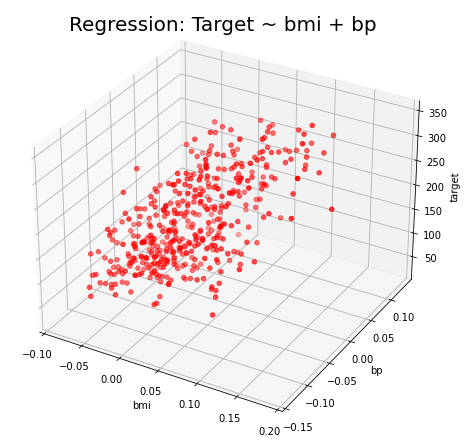

In [22]:
# Create plot
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression: Target ~ bmi + bp', fontsize=20)
ax = axes3d.Axes3D(fig)
ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.4)
ax.scatter3D(df.bmi, df.bp, df.target, c='r')
ax.set_xlabel('bmi')
ax.set_xlim(-.10, .20)
ax.set_ylabel('bp')
ax.set_ylim(ymin=-.15)
ax.set_zlabel('target')

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

train_diabetes, test_diabetes = train_test_split(df, test_size=0.3)

In [24]:
diabetes_x = pd.DataFrame(data = df['bmi'])
diabetes_y = pd.DataFrame(data = df['target'])


In [25]:
diabetes_x_train, diabetes_x_test, diabetes_y_train, diabetes_y_test = train_test_split( diabetes_x, diabetes_y, test_size=0.3, random_state=0)

In [26]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

ridge_regr = Ridge(alpha = 1.0)
ridge_regr.fit(diabetes_x_train,diabetes_y_train)
y_pred_rg = ridge_regr.predict(diabetes_x_test)

In [38]:
#print(r2_score(diabetes_y_train, y_pred_rg))
print('ridge r2', r2_score(diabetes_y_test, y_pred_rg))


ridge r2 0.20006092091264216


In [28]:
from tensorflow.keras import utils, callbacks, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

In [35]:
X = df.drop("target", axis = 1)
y = df["target"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 101)

model = Sequential()
model.add(Dense(15, input_dim=10, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(1))

# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# train the model (set verbose to True to see the output)
model.fit(X_train, y_train, validation_split=0.2, epochs=400, verbose=False)

In [36]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

print('R-sq:', r2_score(y_test, y_pred) )

5/5 [==============================] - 0s 997us/step
R-sq: 0.47885712767161803


# E: COMPARISON

    R2 Multilinear: 0.48
    R2 Ridge: 0.20
    R2 Deep Learning: 0.47

R2 score of multilinear and Deep learning methods are very similar. R2 of multilinear only looks at first 3 features while deep learning uses all features. Computation time on deep learning takes longer for the relatively the same fit. Ridge method yielded the lowest R2 because we only allowed it to used the best correlated feature of BMI. If ridge regression acccounted for more features it might be closer to the other two.